122.73427393998062


ValueError: operands could not be broadcast together with shapes (3,) (163,) 

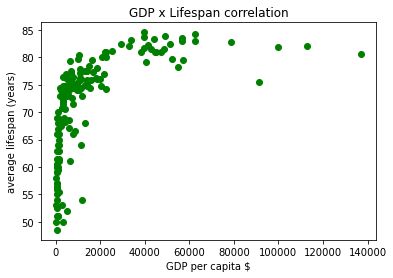

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rnd

plt.title("GDP x Lifespan correlation")
plt.ylabel("average lifespan (years)") 
plt.xlabel("GDP per capita $")

nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True)
perCapita = nations[:,3]/nations[:,6]*1000000

plt.plot(perCapita, nations[:,4], "og")



def rndApprox():

    x = np.sort(perCapita)

    x = np.expand_dims(perCapita, axis = 0)
    p = np.expand_dims(np.arange(0,3), axis = 1)
    x2 = np.power(x, p)

    coeffs = np.array([rnd.uniform(0,100),rnd.uniform(-0.00001,0.00001),rnd.uniform(-0.00000001,0.00000001)])
    coeffs = np.expand_dims(coeffs, axis = 1)

    y = np.matmul(x2.transpose(), coeffs)
    #y = y.transpose() <-- somehow this is nessecary 
    
    return coeffs

def getRMSE(y, y1):
    sum = 0
    #y = nations[:,4] # renamed lifespan array
    #for x in range(len(perCapita)): # for every data point
        #sum += (calcLifeSpan(perCapita[x])-spans[x])**2 # sum up squares of difference between
    rmse = math.sqrt(np.sum((np.subtract(y1, y)**2))/len(perCapita)) # root the sum divided by amount of sum-ups
    print(rmse)
    return rmse


bestResult = [1,1,1]

for i in range(10000):
    k = rndApprox()
    if getRMSE(nations[:,4], k) <  getRMSE(nations[:,4], bestResult):
        bestResult = k


plt.plot(x,y.transpose(), "or")

plt.show()


# RMSE 

# print("RMSE: ", rmse) # result """
